In [ ]:
import numpy as np
import pandas as pd

# Inter-annotator aggreement measures: Cohen's Kappa, Fleiss's Kappa, Krippendorff's Alpha
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters
!pip install krippendorff
import krippendorff

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# @title Load the compiled text and audio annotation data from CSV files
compiled_text_df = pd.read_csv('annotations_text_compiled.csv')
compiled_audio_df = pd.read_csv('annotations_audio_compiled.csv')

# Print and display the head of the compiled text data
print("Compiled Text Data:")
display(compiled_text_df.head())

# Print and display the head of the compiled audio data
print("\nCompiled Audio Data:")
display(compiled_audio_df.head())

Compiled Text Data:


,ID,MentalManip,A,B,C,D,E,F,G,H,Dialogue
0,85514414,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Person1: Jesus! Listen to this one: ""Do you re..."
1,85514415,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Person1: I don't know.\nPerson2: Don't go.\nPe...
2,85514416,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"Person1: You're mine, you know. I made you.\n..."
3,85514417,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Person1: All right. Tell 'em to shoot to kill....
4,85514418,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Person1: You're alive! She didn't kill you!\nP...



Compiled Audio Data:


,ID,MentalManip,A,B,C,D,E,F,G,H,Audio File Name,Dialogue
0,85514414.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,85514414_composed_amanda_mark.mp3,"Person1: Jesus! Listen to this one: ""Do you re..."
1,85514415.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,85514415_composed_amanda_grandma.mp3,Person1: I don't know.\nPerson2: Don't go.\nPe...
2,85514416.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,85514416_composed_ivanna_amanda.mp3,"Person1: You're mine, you know. I made you.\n..."
3,85514417.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,85514417_composed_amanda_mark.mp3,Person1: All right. Tell 'em to shoot to kill....
4,85514418.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,85514418_composed_ivanna_grandma.mp3,Person1: You're alive! She didn't kill you!\nP...


#

# Majority Vote vs `MentalManip` Agreement

In [53]:
def get_majority(compiled_annotations_df,
                 annotators=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']):
  """
  Calculates the majority vote for each row across specified annotator columns.

  Args:
    compiled_annotations_df: DataFrame containing annotations.
    annotators: List of column names corresponding to annotator labels.

  Returns:
    DataFrame with an added 'Majority_Vote' column.
  """
  # Select the columns for majority voting
  annotations_subset = compiled_annotations_df[annotators]

  # Calculate the mode (majority vote) for each row, ignoring NaN values
  # .mode(axis=1) returns a DataFrame, [0] selects the first mode if multiple exist
  majority_vote = annotations_subset.mode(axis=1)[0]

  # Add the majority vote as a new column to the compiled_annotations_df
  compiled_annotations_df['Majority_Vote'] = majority_vote

  # display(compiled_annotations_df) # Optional: uncomment to display the dataframe with the new column
  return compiled_annotations_df

In [54]:
# Calculate the majority vote for the text data
get_majority(compiled_text_df)

# Calculate the majority vote for the audio data
get_majority(compiled_audio_df)

,ID,MentalManip,A,B,C,D,E,F,G,H,Audio File Name,Dialogue,Majority_Vote
0,85514414.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,85514414_composed_amanda_mark.mp3,"Person1: Jesus! Listen to this one: ""Do you re...",0.0
1,85514415.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,85514415_composed_amanda_grandma.mp3,Person1: I don't know.\nPerson2: Don't go.\nPe...,0.0
2,85514416.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,85514416_composed_ivanna_amanda.mp3,"Person1: You're mine, you know. I made you.\n...",1.0
3,85514417.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,85514417_composed_amanda_mark.mp3,Person1: All right. Tell 'em to shoot to kill....,1.0
4,85514418.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,85514418_composed_ivanna_grandma.mp3,Person1: You're alive! She didn't kill you!\nP...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,85514579.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,85514579_composed_grandpa_mark.mp3,Person1: I swear it. By Excalibur and the holy...,0.0
96,85514582.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,85514582_composed_sassy_grandpa.mp3,"Person1: Well? Was ""Vicki"" right? About your...",0.0
97,85514586.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,85514586_composed_grandma_sassy.mp3,"Person1: Oh, well...those are...I mean, we don...",0.0
98,85514589.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,85514589_composed_amanda_ivanna.mp3,"Person1: Keep stallin'.\nPerson2: Alright, I'm...",0.0


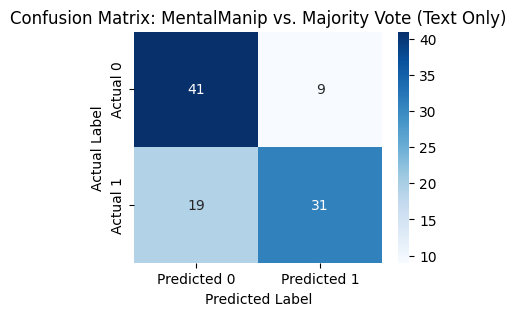

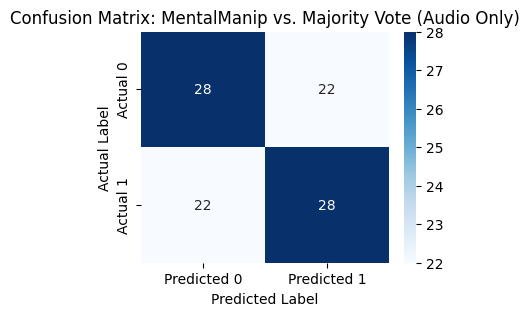

In [52]:
def plot_confusion_matrix(df, title):
  """
  Generates and plots a confusion matrix for 'MentalManip' and 'Majority_Vote' columns.

  Args:
    df: DataFrame containing 'MentalManip' and 'Majority_Vote' columns.
    title: Title for the confusion matrix plot.
  """
  # Ensure both columns are of the same data type and handle potential NaNs
  # Drop rows where either 'MentalManip' or 'Majority_Vote' is NaN
  filtered_df = df.dropna(subset=['MentalManip', 'Majority_Vote']).copy()

  # Convert columns to integer type if necessary
  filtered_df['MentalManip'] = filtered_df['MentalManip'].astype(int)
  filtered_df['Majority_Vote'] = filtered_df['Majority_Vote'].astype(int)

  # Generate the confusion matrix
  conf_matrix = confusion_matrix(filtered_df['MentalManip'], filtered_df['Majority_Vote'])

  # Display the confusion matrix using a heatmap
  plt.figure(figsize=(4, 3))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.title(title)
  plt.show()

# Example usage (you can call this function for your text and audio dataframes)
plot_confusion_matrix(compiled_text_df, 'Confusion Matrix: MentalManip vs. Majority Vote (Text Only)')
plot_confusion_matrix(compiled_audio_df, 'Confusion Matrix: MentalManip vs. Majority Vote (Audio Only)')

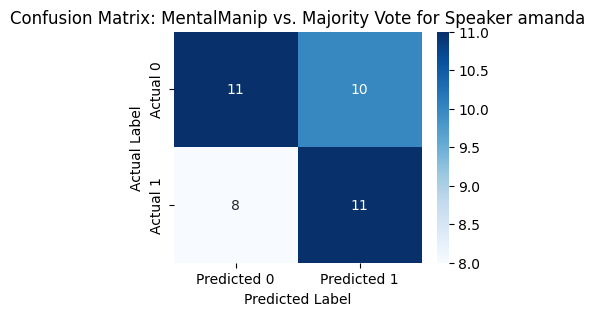

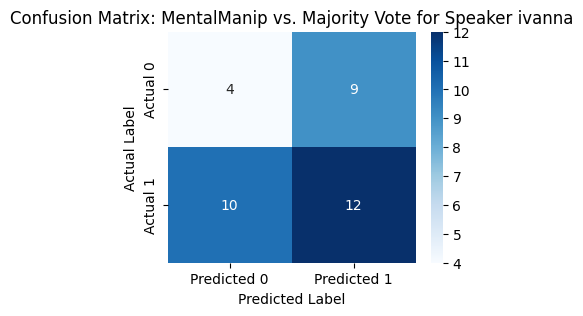

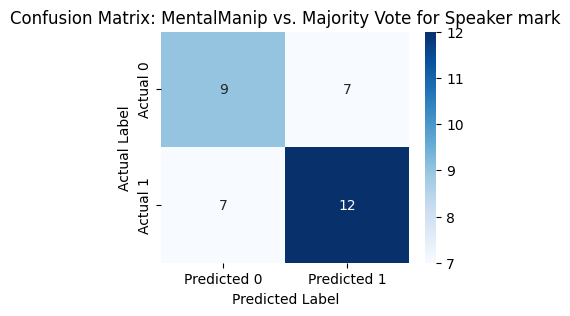

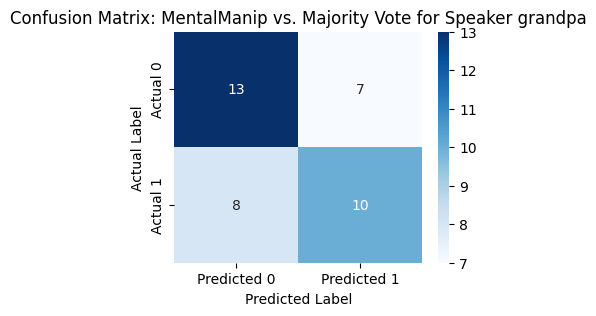

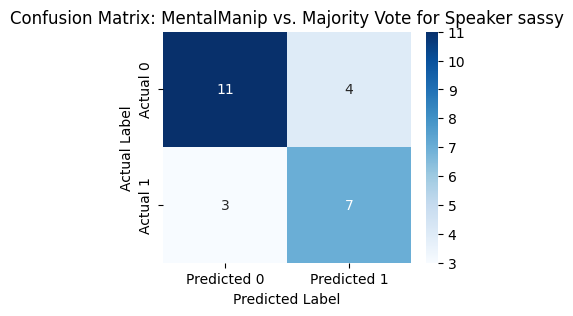

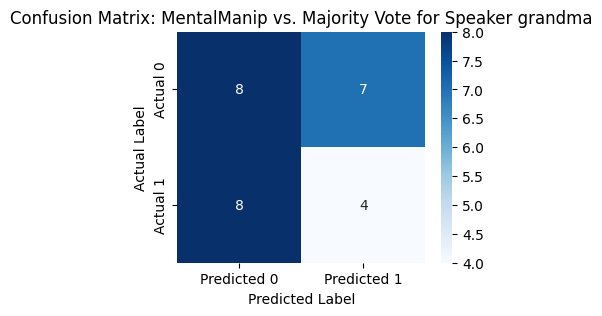

[np.float64(0.55), np.float64(0.45714285714285713), np.float64(0.6), np.float64(0.6052631578947368), np.float64(0.72), np.float64(0.4444444444444444)]


In [126]:
#@title Speaker Effect on Aggreement

speakers = ['amanda', 'ivanna', 'mark', 'grandpa', 'sassy', 'grandma']
accuracy_speakers = [] # List to store accuracy for each speaker

for i, s in enumerate(speakers):

  speaker_filter = compiled_audio_df['Audio File Name'].str.contains(s)
  plot_confusion_matrix(compiled_audio_df[speaker_filter], f'Confusion Matrix: MentalManip vs. Majority Vote for Speaker {speakers[i]}')

  accuracy_speakers.append( (compiled_audio_df[speaker_filter]['MentalManip'] == compiled_audio_df[speaker_filter]['Majority_Vote']).mean() )

# Print the list of accuracies for each speaker
print(accuracy_speakers)
# Based on the accuracies, there seems to be no significant difference in agreement across speakers

# Inter-annotator Agreement

## 1. Krippendorff's Alpha

In [83]:
def get_krippendorffs_alpha(df,
                            annotators= ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']):
  """
  Calculates Krippendorff's Alpha for a given DataFrame and list of annotators.

  Args:
    df: DataFrame containing the annotation data.
    annotators: List of column names representing the annotators.

  Returns:
    The calculated Krippendorff's Alpha value.
  """
  # Select only the annotator columns, drop rows with less than 2 non-NaN values,
  # replace empty strings with NaN, and convert to float type.
  df = df[annotators].dropna(thresh=2).replace('', np.nan).astype(float)

  # Convert the DataFrame to a NumPy array and transpose it so each row represents an annotator
  data = df.to_numpy().T # each row is an annotator

  # Calculate Krippendorff's Alpha using the nominal level of measurement
  alpha = krippendorff.alpha(
    reliability_data=data,         # The data to calculate agreement on
    level_of_measurement='nominal',) # The level of measurement of the data

  return alpha

# Example usage:
# get_krippendorffs_alpha(compiled_text_df)

In [84]:
# Text
alpha_text_all = get_krippendorffs_alpha(compiled_text_df)
print(f"Krippendorff's Alpha (Text Only - All Annotators): {alpha_text_all}")

# Audio
alpha_audio_all = get_krippendorffs_alpha(compiled_audio_df)
print(f"Krippendorff's Alpha (Audio Only - All Annotators): {alpha_audio_all}")

Krippendorff's Alpha (Text Only - All Annotators): 0.3189764041209704
Krippendorff's Alpha (Audio Only - All Annotators): 0.2868457300275481


In [85]:
#@title Interactive Krippendorff's Alpha - Select annotators
import ipywidgets as widgets
from IPython.display import display

all_annotators = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Create a checkbox for each annotator
checkboxes = [widgets.Checkbox(value=False, description=annotator) for annotator in all_annotators]

# Arrange checkboxes in a HBox
annotator_selector = widgets.HBox(children=checkboxes)

print("Select Annotators:")
display(annotator_selector)

# Function to get the selected annotators
def get_selected_annotators():
    return [checkbox.description for checkbox in checkboxes if checkbox.value]

# You can then call this function to get the selected annotators and pass it to get_krippendorffs_alpha
# Example:
# selected = get_selected_annotators()
# print(selected)
# alpha = get_krippendorffs_alpha(compiled_text_df, annotators=selected)
# print(f"Krippendorff's Alpha (Text Only - Selected Annotators): {alpha}")

Select Annotators:


In [87]:
# @title Calculate Krippendorff's Alpha for a subset of annotators

# Text
subset_annotators_text = get_selected_annotators()
alpha_text_subset = get_krippendorffs_alpha(compiled_text_df, annotators=subset_annotators_text)
print(f"\nKrippendorff's Alpha (Text Only - Annotators {subset_annotators_text}): {alpha_text_subset}")

# Audio
subset_annotators_audio = get_selected_annotators()
alpha_audio_subset = get_krippendorffs_alpha(compiled_audio_df, annotators=subset_annotators_audio)
print(f"Krippendorff's Alpha (Audio Only - Annotators {subset_annotators_audio}): {alpha_audio_subset}")


Krippendorff's Alpha (Text Only - Annotators ['B', 'F', 'G', 'H']): 0.5260416666666667
Krippendorff's Alpha (Audio Only - Annotators ['B', 'F', 'G', 'H']): 0.2857142857142858


## 2. Cohen's Kappa

In [99]:
def get_cohens_kappa(df,
                     annotators= ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']):
  """
  Calculates and plots the pairwise Cohen's Kappa scores for a given DataFrame and list of annotators.

  Args:
    df: DataFrame containing the annotation data.
    annotators: List of column names representing the annotators.
  """
  # Initialize a grid to store Cohen's Kappa scores
  cohen_grid = [[np.nan]*len(annotators) for i in annotators]

  # Calculate pairwise Cohen's Kappa for each pair of annotators
  for i, rater1 in enumerate(annotators):
    for j in range(i+1, len(annotators)):
      rater2 = annotators[j]
      # print(rater1, rater2) # Optional: uncomment to see which pair is being processed

      # Select current pair of annotators and drop rows with missing values
      df_i_j = df[[rater1, rater2]].dropna().astype(int)
      # print(df_i_j[rater1]) # Optional: uncomment to see the data used for calculation

      # Calculate Cohen's Kappa score
      score = cohen_kappa_score(df_i_j[rater1], df_i_j[rater2])
      # print(score) # Optional: uncomment to see the calculated score

      cohen_grid[i][j] = score

      # if np.isnan(score): # Check for NaN scores (can happen if there's no agreement)
      #   print(f"NaN score for {rater1} and {rater2}. Data used:")
      #   display(df_i_j)


  # Plot the pairwise Cohen's Kappa scores as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cohen_grid, annot=True, cmap='viridis', fmt=".2f",
              xticklabels=annotators, yticklabels=annotators)
  plt.title('Pairwise Cohen\'s Kappa')
  plt.xlabel('Annotators')
  plt.ylabel('Annotators')
  plt.show()

# Example usage:
# get_cohens_kappa(compiled_text_df, annotators= get_selected_annotators())
# get_cohens_kappa(compiled_audio_df, annotators= get_selected_annotators())

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local

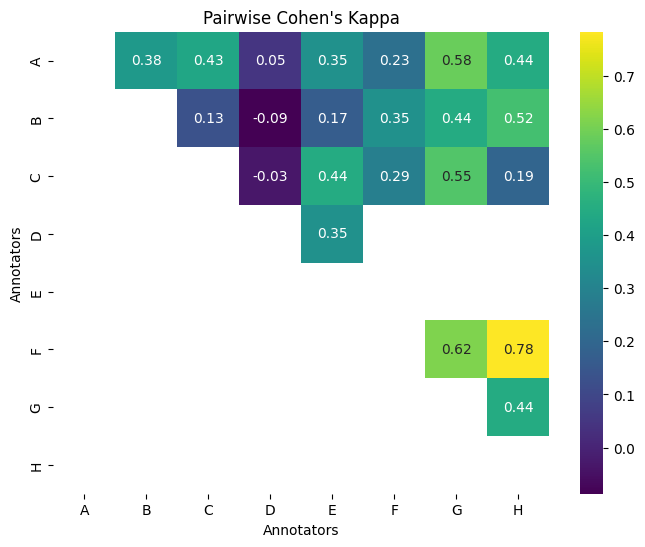

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local

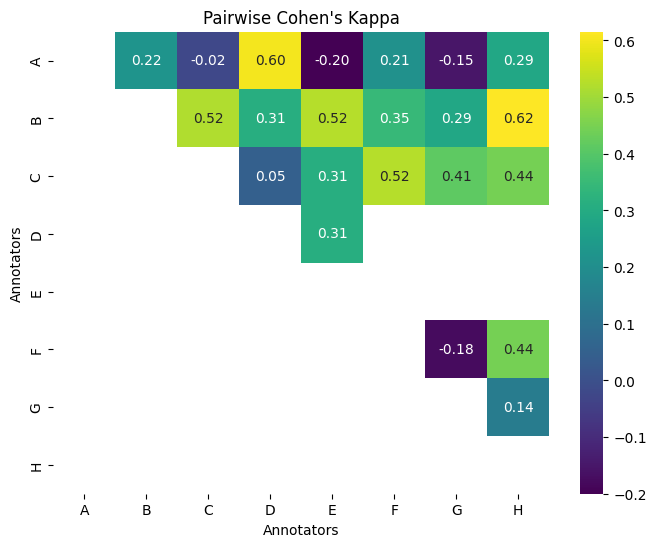

In [104]:
get_cohens_kappa(compiled_text_df)
get_cohens_kappa(compiled_audio_df)

Select Annotators:



Text Data:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local

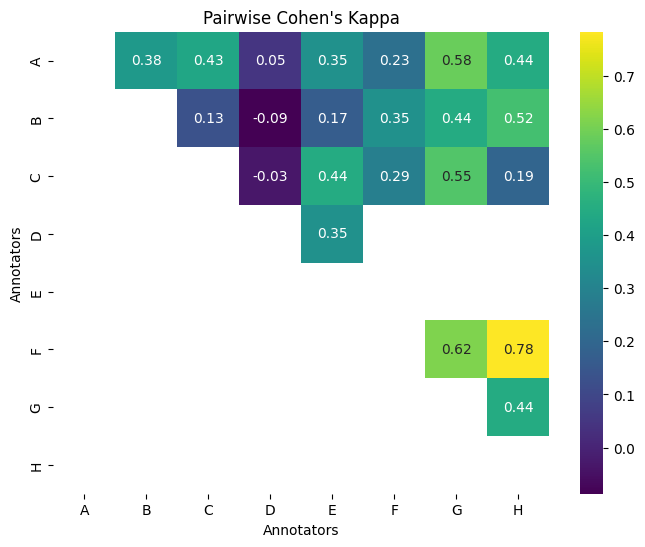


Audio Data:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local

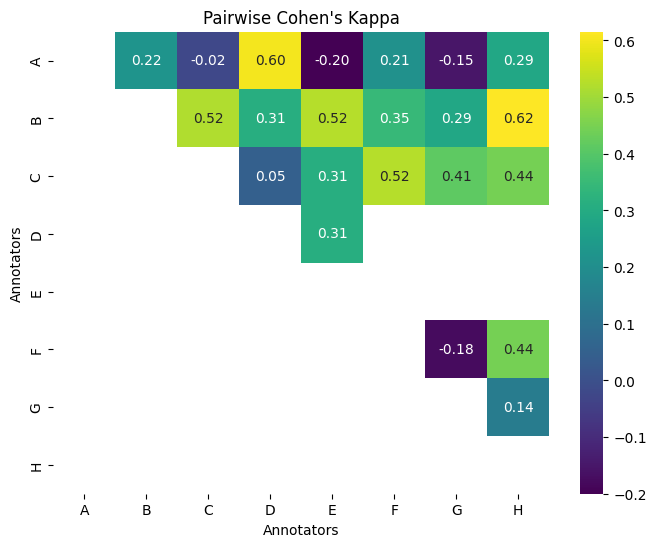

In [103]:
# @title Interactive Cohen's Kappa
print("Select Annotators:")
display(annotator_selector)
selected_annotators = get_selected_annotators()

# Text
print('\nText Data:')
get_cohens_kappa(compiled_text_df, annotators=selected_annotators)

# Audio
print('\nAudio Data:')
get_cohens_kappa(compiled_audio_df, annotators=selected_annotators)

## 3. Fleiss's Kappa

In [119]:
def get_fleiss_kappa(df,
                     annotators=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], n_cat=2):
  df = df[annotators].dropna().astype(int)
  data = df.to_numpy() # each column is an annotator

  category_table_data, categories = aggregate_raters(data, n_cat=n_cat) # binary classification n_cat=2
  kappa = fleiss_kappa(category_table_data)

  return kappa

In [130]:
# Text
kappa_text_subset = get_fleiss_kappa(compiled_text_df,
                                     annotators = ['B', 'F', 'G', 'H'])
print(f"Fleiss' Kappa (Text Only - Annotators ['B', 'F', 'G', 'H']): {kappa_text_subset}")


# Audio
kappa_audio_subset = get_fleiss_kappa(compiled_audio_df,
                                      annotators = ['B', 'C', 'F', 'H'])
print(f"Fleiss' Kappa (Audio Only - Annotators ['B', 'C', 'F', 'H']): {kappa_audio_subset}")

Fleiss' Kappa (Text Only - Annotators ['B', 'F', 'G', 'H']): 0.5138888888888887
Fleiss' Kappa (Audio Only - Annotators ['B', 'C', 'F', 'H']): 0.5138888888888887
